<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [6]:
#!pip install "tensorflow<2.11"

In [7]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [8]:
#!pip install torchvision

In [9]:

#!pip list
import torch

In [10]:
#!nvidia-smi

In [11]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [12]:
# add headings with ##(space) on the markdowns

In [13]:
#!pip install tensorflor keras

In [14]:
import tensorflow as tf
import os

In [15]:
!nvidia-smi

Thu Apr 11 13:37:41 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [16]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [18]:
#! nvidia-smi

In [19]:
!pip install opencv-python

## Imports

In [20]:
import tensorflow as tf
import os
import cv2
import imghdr

## Removing false images

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
Current_dir = os.getcwd()
Current_dir

'/content'

In [24]:
path = '/content/drive/MyDrive/Colab Notebooks/Thesis'
os.chdir(path)

In [25]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis'

In [26]:
data_dir='data'
os.listdir(data_dir)

['Sample_images', 'Ads']

In [27]:
os.listdir(os.path.join(data_dir,'Ads'))

['folder_2_iframe_1028_AD.jpg',
 'folder_2_iframe_459_AD.jpg',
 'folder_2_iframe_1024_AD.jpg',
 'folder_2_iframe_1023_AD.jpg',
 'folder_2_iframe_626_AD.jpg',
 'folder_2_iframe_333_AD.jpg',
 'folder_2_iframe_548_AD.jpg',
 'folder_2_iframe_1026_AD.jpg',
 'folder_2_iframe_131_AD.jpg',
 'folder_2_iframe_378_AD.jpg',
 'folder_2_iframe_1025_AD.jpg',
 'folder_2_iframe_501_AD.jpg',
 'folder_2_iframe_340_AD.jpg',
 'folder_3_iframe_1569_AD.jpg',
 'folder_4_iframe_667_AD.jpg',
 'folder_3_iframe_208_AD.jpg',
 'folder_3_iframe_1610_AD.jpg',
 'folder_3_iframe_387_AD.jpg',
 'folder_2_iframe_78_AD.jpg',
 'folder_3_iframe_2354_AD.jpg',
 'folder_3_iframe_313_AD.jpg',
 'folder_3_iframe_5624_AD.jpg',
 'folder_3_iframe_961_AD.jpg',
 'folder_3_iframe_319_AD.jpg',
 'folder_3_iframe_2394_AD.jpg',
 'folder_3_iframe_589_AD.jpg',
 'folder_3_iframe_2665_AD.jpg',
 'folder_3_main_706_AD.jpg',
 'folder_3_iframe_321_AD.jpg',
 'folder_4_iframe_3042_AD.jpg',
 'folder_3_main_2877_AD.jpg',
 'folder_3_iframe_5517_AD.jpg',

In [28]:
imgTest= cv2.imread(os.path.join('data','Ads','folder_2_iframe_77_AD.jpg'))

In [29]:
type(imgTest)

numpy.ndarray

In [30]:
imgTest.shape

(1880, 1456, 3)

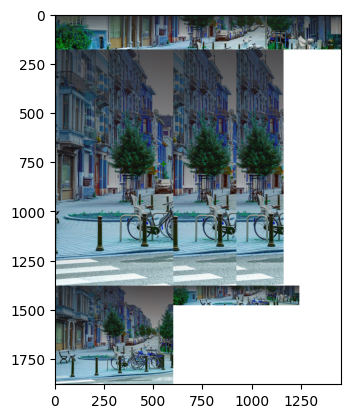

In [31]:
plt.imshow(imgTest)

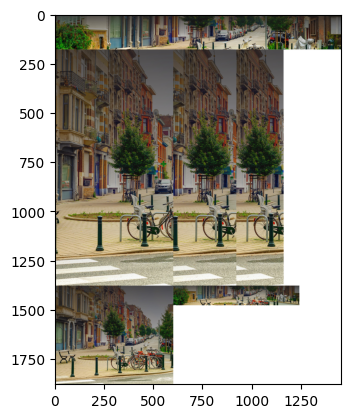

In [32]:
plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
plt.show()

Load Data

In [33]:
#tf.data.Dataset??

In [34]:
#tf.keras.utils.audio_dataset_from_directory??

In [35]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 473 files belonging to 2 classes.


In [36]:
data_iterator=data.as_numpy_iterator()


In [37]:
batch=data_iterator.next()


In [38]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [39]:
batch[0].shape # images are numpy arrays

(32, 256, 256, 3)

In [40]:
batch[1] # labels

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

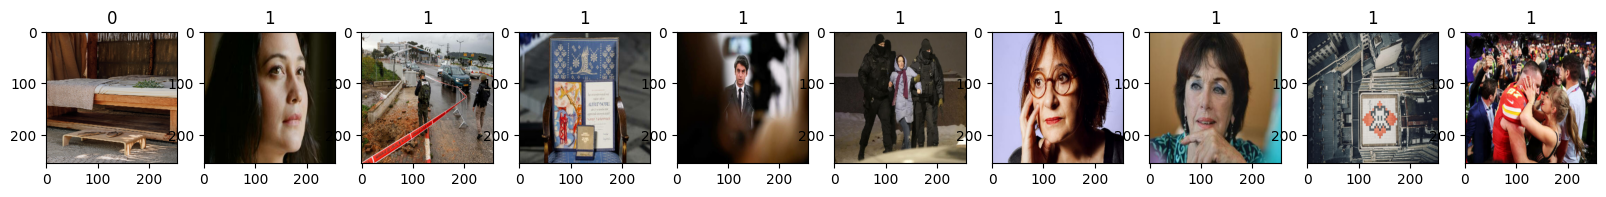

In [41]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [42]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [43]:
#batch[0] / 255

In [44]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [45]:
scaled.as_numpy_iterator().next()

(array([[[[0.14227942, 0.1932598 , 0.25992647],
          [0.14122051, 0.1922009 , 0.25886756],
          [0.14399509, 0.1949755 , 0.26164216],
          ...,
          [0.06776961, 0.12659314, 0.20110294],
          [0.05710784, 0.11593137, 0.19044118],
          [0.07500575, 0.13382928, 0.20833908]],
 
         [[0.14618374, 0.19716413, 0.2638308 ],
          [0.14117648, 0.19215687, 0.25882354],
          [0.13667853, 0.18765894, 0.2543256 ],
          ...,
          [0.08002451, 0.13884804, 0.21335784],
          [0.07267157, 0.1314951 , 0.2060049 ],
          [0.08633579, 0.14515932, 0.21966912]],
 
         [[0.14479166, 0.19577205, 0.2624387 ],
          [0.13954695, 0.19052735, 0.257194  ],
          [0.13333334, 0.18431373, 0.2509804 ],
          ...,
          [0.08216912, 0.14099264, 0.21550246],
          [0.07843138, 0.13725491, 0.21176471],
          [0.08468137, 0.1435049 , 0.2180147 ]],
 
         ...,
 
         [[0.5029412 , 0.4990196 , 0.51862746],
          [0.49822

In [46]:
scaled_iterator=scaled.as_numpy_iterator()

In [47]:
batch = scaled_iterator.next()

In [48]:
batch[0].min()

0.0

In [49]:
scaled.as_numpy_iterator().next()

(array([[[[0.1403799 , 0.1403799 , 0.1403799 ],
          [0.1403799 , 0.1403799 , 0.1403799 ],
          [0.1311734 , 0.1311734 , 0.1311734 ],
          ...,
          [0.99181986, 0.99181986, 0.98450065],
          [0.9921345 , 0.9921345 , 0.9842914 ],
          [0.99215686, 0.99215686, 0.9843137 ]],
 
         [[0.09019608, 0.09019608, 0.09019608],
          [0.09019608, 0.09019608, 0.09019608],
          [0.09385723, 0.09385723, 0.09385723],
          ...,
          [0.9862132 , 0.9882353 , 0.9859282 ],
          [0.99081826, 0.99095255, 0.9850643 ],
          [0.99114585, 0.99114585, 0.98532474]],
 
         [[0.09693628, 0.09693628, 0.09693628],
          [0.09693628, 0.09693628, 0.09693628],
          [0.08360931, 0.08360931, 0.08360931],
          ...,
          [0.9762717 , 0.9835553 , 0.98356336],
          [0.9811981 , 0.9817189 , 0.9846048 ],
          [0.9814951 , 0.9814951 , 0.98366725]],
 
         ...,
 
         [[0.6509973 , 0.9457445 , 0.99463695],
          [0.67941

# Split Data

In [50]:
#len(scaled)
len(data)

15

In [51]:
train_size = int(len(scaled)*.7)# batch size 8, 156 batches, 32, 41 batches
val_size = int(len(scaled)*.2) # 44 batces
test_size = int(len(scaled)*.1) # 22 batches
#test_size = int(len(scaledtest)) # 22 batches

In [52]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 10, Val Size:3, Test Size: 1


In [53]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [54]:
train.as_numpy_iterator().next()[0]

array([[[[0.6047239 , 0.67139053, 0.7106062 ],
         [0.58835787, 0.6432598 , 0.6863971 ],
         [0.52677697, 0.5788603 , 0.6234069 ],
         ...,
         [0.6222426 , 0.673223  , 0.6967524 ],
         [0.6074755 , 0.6584559 , 0.6897059 ],
         [0.58933824, 0.64031863, 0.67561275]],

        [[0.6077033 , 0.67437005, 0.71358573],
         [0.59161496, 0.6465169 , 0.6896542 ],
         [0.5295956 , 0.5816789 , 0.6262255 ],
         ...,
         [0.6222426 , 0.673223  , 0.6967524 ],
         [0.6107843 , 0.6617647 , 0.6930147 ],
         [0.5926471 , 0.64362746, 0.6789216 ]],

        [[0.60949755, 0.6761642 , 0.7153799 ],
         [0.59384763, 0.6487496 , 0.69188684],
         [0.5311887 , 0.58327204, 0.62781864],
         ...,
         [0.6222426 , 0.673223  , 0.6967524 ],
         [0.6129653 , 0.6639457 , 0.6951957 ],
         [0.5987745 , 0.6497549 , 0.685049  ]],

        ...,

        [[0.41945276, 0.7091586 , 0.95744294],
         [0.25038296, 0.52231926, 0.75826246]

In [55]:
batch[0]

array([[[[3.89162064e-01, 3.89162064e-01, 3.89162064e-01],
         [3.92156869e-01, 3.92156869e-01, 3.92156869e-01],
         [3.96078438e-01, 3.96078438e-01, 3.96078438e-01],
         ...,
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01],
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01],
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01]],

        [[3.85355383e-01, 3.85355383e-01, 3.85355383e-01],
         [3.91049087e-01, 3.91049087e-01, 3.91049087e-01],
         [3.92271757e-01, 3.92271757e-01, 3.92271757e-01],
         ...,
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01],
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01],
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01]],

        [[3.81510407e-01, 3.81510407e-01, 3.81510407e-01],
         [3.87285531e-01, 3.87285531e-01, 3.87285531e-01],
         [3.88426781e-01, 3.88426781e-01, 3.88426781e-01],
         ...,
         [1.13725491e-01, 1.13725491e-01, 1.13725491e-01],
         [

In [56]:
len(train)

10

# Model

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout

In [58]:
model = Sequential()

In [59]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

# Train

In [62]:
hist = model.fit(train, epochs=8, validation_data=val)

Epoch 1/8
10/10 [==============================] - 18s 713ms/step - loss: 0.7769 - accuracy: 0.7031 - val_loss: 0.5899 - val_accuracy: 0.7604
Epoch 2/8
10/10 [==============================] - 6s 536ms/step - loss: 0.5382 - accuracy: 0.7719 - val_loss: 0.5213 - val_accuracy: 0.7396
Epoch 3/8
10/10 [==============================] - 6s 444ms/step - loss: 0.5012 - accuracy: 0.7969 - val_loss: 0.3984 - val_accuracy: 0.8229
Epoch 4/8
10/10 [==============================] - 7s 583ms/step - loss: 0.4188 - accuracy: 0.8156 - val_loss: 0.3349 - val_accuracy: 0.8646
Epoch 5/8
10/10 [==============================] - 6s 447ms/step - loss: 0.4097 - accuracy: 0.8250 - val_loss: 0.4094 - val_accuracy: 0.7917
Epoch 6/8
10/10 [==============================] - 9s 706ms/step - loss: 0.3116 - accuracy: 0.8656 - val_loss: 0.1879 - val_accuracy: 0.9479
Epoch 7/8
10/10 [==============================] - 5s 429ms/step - loss: 0.2763 - accuracy: 0.8875 - val_loss: 0.3605 - val_accuracy: 0.8438
Epoch 8/8
10

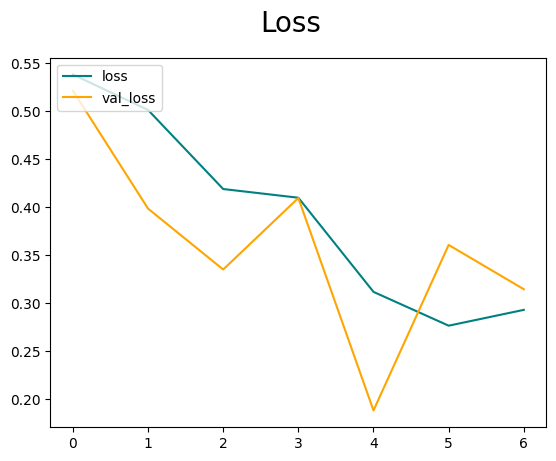

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'][1:], color='teal', label='loss')
plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

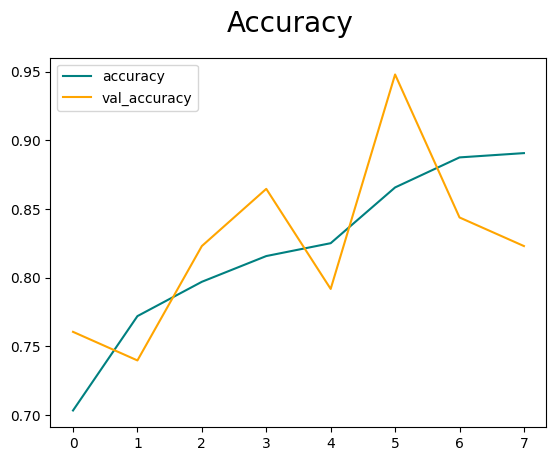

In [64]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [65]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [66]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 127ms/step
Precision: 0.8214285969734192, Recall:1.0, Accuracy: 0.84375


# Extra Testing on Unseen Data

In [68]:
import cv2

In [69]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis'

array([[[164, 107,  52],
        [164, 107,  52],
        [164, 107,  52],
        ...,
        [166, 114,  77],
        [166, 114,  77],
        [166, 114,  77]],

       [[164, 107,  52],
        [164, 107,  52],
        [164, 107,  52],
        ...,
        [166, 114,  77],
        [166, 114,  77],
        [166, 114,  77]],

       [[164, 107,  52],
        [164, 107,  52],
        [164, 107,  52],
        ...,
        [166, 114,  77],
        [166, 114,  77],
        [166, 114,  77]],

       ...,

       [[ 14,  13,  17],
        [ 14,  13,  17],
        [ 14,  13,  17],
        ...,
        [ 29,  24,  39],
        [ 29,  24,  39],
        [ 29,  24,  39]],

       [[ 14,  13,  17],
        [ 14,  13,  17],
        [ 14,  13,  17],
        ...,
        [ 30,  25,  40],
        [ 30,  25,  40],
        [ 30,  25,  40]],

       [[ 14,  13,  17],
        [ 14,  13,  17],
        [ 14,  13,  17],
        ...,
        [ 30,  25,  40],
        [ 30,  25,  40],
        [ 30,  25,  40]]], dtype=uint8)
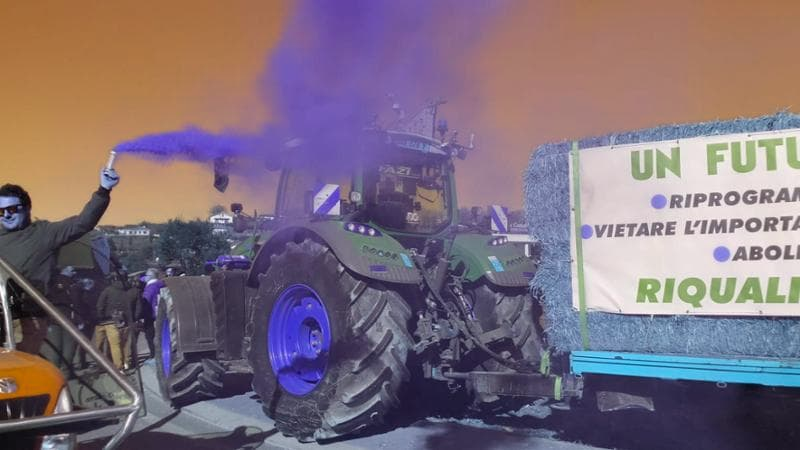

In [70]:
#img = cv2.imread('sim.jpg')
#img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
img= cv2.imread(os.path.join('unseen data','folder_5_main_12.jpg')) # futurama.jpeg, homer-simpson-wallpaper-preview.jpg , zoid.jpeg, bart-simpson-.jpg, fry.jpeg, homer-simpson-the-simpsons-.jpg, marg.jpg
img

In [71]:
len(img)


450

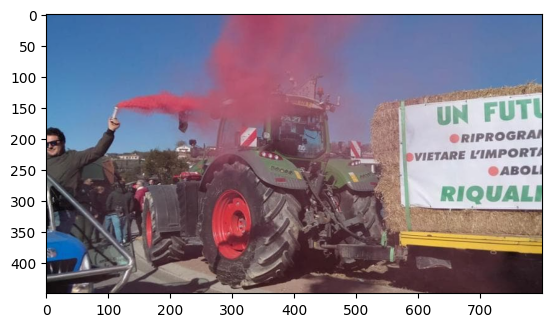

In [72]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [73]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [74]:
resize.shape

TensorShape([256, 256, 3])

In [75]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 420ms/step


array([[0.8621434]], dtype=float32)

In [ ]:
#class 1= futurama, class 0 = simpsons

if yhat < 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

Predicted class is simpsons


# Saving the model

In [ ]:
from keras.models import load_model

In [ ]:
model.save(os.path.join('models','futurama_and_simpsons_First.h5'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

# Appling a Pre-trained CNN on our Dataset for comparison

The VGG16 model

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

In [ ]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

We will add a dense layer after our conv_base NN

In [ ]:
from keras import models
from keras import layers

modelPreT = models.Sequential()
modelPreT.add(conv_base)

modelPreT.add(layers.Flatten())
modelPreT.add(layers.Dense(256, activation='relu'))
modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
modelPreT.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 23,103,809
Non-trainable params: 0
_________________________________________________________________


Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the VGG16

In [ ]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [ ]:
conv_base.trainable = False

In [ ]:
print('This is the number of trainable weights '
      'after freezing the conv base:', len(modelPreT.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [ ]:
modelPreT.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
train.as_numpy_iterator().next()[0]

array([[[[0.05882353, 0.09019608, 0.13333334],
         [0.06534927, 0.09672181, 0.1420343 ],
         [0.06755514, 0.10196079, 0.14800858],
         ...,
         [0.2606924 , 0.2891544 , 0.09702819],
         [0.19295344, 0.22040442, 0.0596201 ],
         [0.14509805, 0.17254902, 0.01176471]],

        [[0.0519761 , 0.08448989, 0.12420343],
         [0.05913487, 0.09228168, 0.13353744],
         [0.06243741, 0.0988313 , 0.14031415],
         ...,
         [0.24380565, 0.26998517, 0.0846618 ],
         [0.19842781, 0.2235963 , 0.06167076],
         [0.16449907, 0.18966758, 0.02774203]],

        [[0.03956801, 0.07414982, 0.10765931],
         [0.04787388, 0.08423582, 0.11814043],
         [0.05316366, 0.09316041, 0.12637119],
         ...,
         [0.2132055 , 0.235249  , 0.06225293],
         [0.20834781, 0.2293803 , 0.06538672],
         [0.19965532, 0.2206878 , 0.05669424]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [ ]:
histPreT = modelPreT.fit(train, epochs=4, validation_data=val) #  epochs 10 are over fitting. early stop at?

Epoch 1/4


56/56 [==============================] - 23s 263ms/step - loss: 0.6345 - accuracy: 0.8800 - val_loss: 0.0853 - val_accuracy: 0.9688
Epoch 2/4
56/56 [==============================] - 14s 259ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0496 - val_accuracy: 0.9883
Epoch 3/4
56/56 [==============================] - 14s 258ms/step - loss: 0.0062 - accuracy: 0.9994 - val_loss: 0.0226 - val_accuracy: 0.9922
Epoch 4/4
56/56 [==============================] - 14s 259ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0243 - val_accuracy: 0.9922


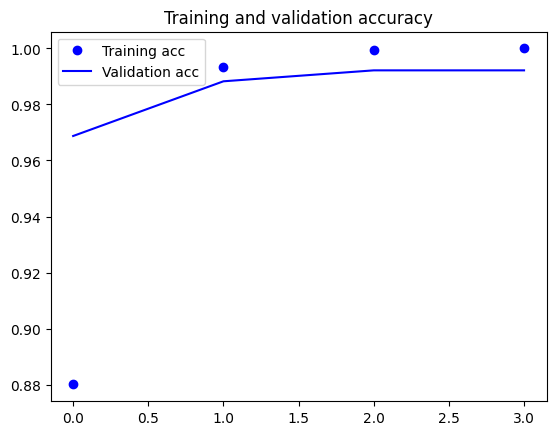

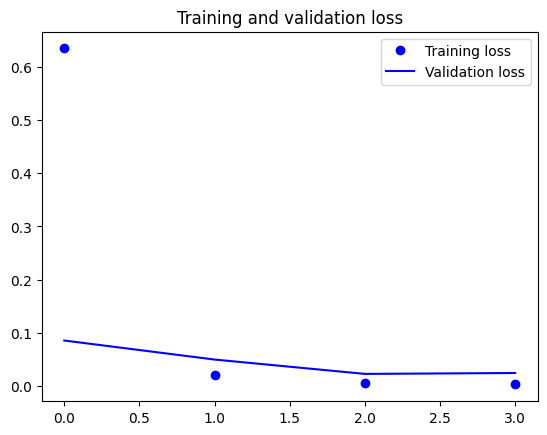

In [ ]:
acc = histPreT.history['accuracy']
val_acc = histPreT.history['val_accuracy']
loss = histPreT.history['loss']
val_loss = histPreT.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhatPreT = modelPreT.predict(X)
    pre.update_state(y, yhatPreT)
    re.update_state(y, yhatPreT)
    acc.update_state(y, yhatPreT)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

1/1 [==============================] - 0s 122ms/step
Precision: 1.0, Recall:1.0, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Precision: 1.0, Recall:1.0, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Precision: 1.0, Recall:1.0, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Precision: 1.0, Recall:1.0, Accuracy: 1.0
1/1 [==============================] - 0s 27ms/step
Precision: 1.0, Recall:1.0, Accuracy: 1.0
1/1 [==============================] - 0s 28ms/step
Precision: 1.0, Recall:0.9813084006309509, Accuracy: 0.9895833134651184
1/1 [==============================] - 0s 28ms/step
Precision: 1.0, Recall:0.9836065769195557, Accuracy: 0.9910714030265808
1/1 [==============================] - 0s 28ms/step
Precision: 1.0, Recall:0.9856114983558655, Accuracy: 0.9921875


In [ ]:
imgPre= cv2.imread(os.path.join('testData','Unseen','futurama1.jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg
#imgPre= cv2.imread(os.path.join('testData','s (481).jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg

In [ ]:
plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resizePreT = tf.image.resize(imgPre, (256,256))
#resize

In [ ]:
#plt.imshow(resizePreT.numpy().astype(int))
#plt.show()

In [ ]:
#np.expand_dims(resizePreT,0).shape

In [ ]:
yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
yhat_newPreT

1/1 [==============================] - 1s 809ms/step


array([[0.03003706]], dtype=float32)

For the pretrained model the classes were inverted, so we have:

Simpsons = 0 <br>
Futurama = 1

In [ ]:
#class 0= futurama, class 1 = simpsons

if yhat_newPreT < 0.5:
    print(f'Predicted class is simpsons')
else:
    print(f'Predicted class is futurama')

Predicted class is simpsons


In [ ]:
modelPreT.save(os.path.join('models','Pretrained_futurama_and_simpsons.h5'))
modelPreT.summary()  # As a reminder.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23,103,809
Trainable params: 8,389,121
Non-trainable params: 14,714,688
_________________________________________________________________
